# Collaboration and Competition

---

### 1. Init
Import packages, create the unity environment, and instantiate a new agent.

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import torch
import random

# confirm cuda setup
print("CUDA is available: ", torch.cuda.is_available())
torch.cuda.empty_cache()
print("Current device: ", torch.cuda.current_device())
print("Device name: ", torch.cuda.get_device_name(0))

env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

from ddpg_agent import Agent
agent = Agent(state_size=24, action_size=2, random_seed=0)

CUDA is available:  True
Current device:  0
Device name:  GeForce GTX 1080 Ti


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Train The Agent (Optional)

Episode 100	Average Score: 0.00	Score: 0.00
Episode 200	Average Score: 0.00	Score: 0.00
Episode 300	Average Score: 0.01	Score: 0.00
Episode 400	Average Score: 0.02	Score: 0.00
Episode 500	Average Score: 0.01	Score: 0.10
Episode 600	Average Score: 0.04	Score: 0.09
Episode 700	Average Score: 0.09	Score: 0.09
Episode 800	Average Score: 0.08	Score: 0.10
Episode 900	Average Score: 0.14	Score: 0.20
Episode 1000	Average Score: 0.15	Score: 0.10
Episode 1100	Average Score: 0.26	Score: 0.10
Episode 1200	Average Score: 0.25	Score: 0.30
Episode 1300	Average Score: 0.86	Score: 2.70
Episode 1400	Average Score: 1.29	Score: 2.60
Episode 1500	Average Score: 1.94	Score: 2.60
Episode 1600	Average Score: 1.83	Score: 2.60
Episode 1700	Average Score: 2.00	Score: 2.60
Episode 1800	Average Score: 1.75	Score: 2.60
Episode 1900	Average Score: 0.71	Score: 0.60
Episode 2000	Average Score: 0.53	Score: 0.10


/home/user/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/user/anaconda3/envs/drlnd/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


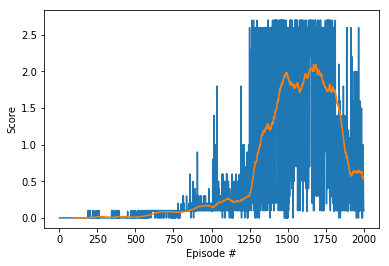

In [2]:
def ddpg(n_episodes=2000):
    scores_deque = deque(maxlen=100)
    scores = []
    max_score = -np.Inf
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations
        agent.reset()
        score = [0, 0]
        while True:
            action = [ agent.act(state[i]) for i in range(2) ] # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations      # get the next state
            reward = env_info.rewards                      # get the reward
            done = env_info.local_done                     # see if episode has finished
            for i in range(2):
                score[i] += reward[i]
                volleys = 10*score[i]+1
                # only add to the experience buffer for the initial volleys
                if reward[i] != 0 or (random.uniform(0, 1) < 1 / (volleys*volleys*volleys)):
                    agent.step(state[i], action[i], reward[i], next_state[i], done[i])
            state = next_state
            if done[0] or done[1]:
                break
        scores_deque.append(max(score))
        scores.append(max(score))
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), max(score)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
        if np.mean(scores_deque) > max_score:
            max_score = np.mean(scores_deque)
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
    return scores

scores = ddpg()

running_avg = [ np.mean(scores[i-100:i]) for i in range(len(scores)) if i >= 99]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.plot(np.arange(100, len(scores)+1), running_avg)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 3. Agent Demo
Load the agent and run a session in the environment.

In [3]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations
agent.reset()
score = [0, 0]

while True:
    action = [ agent.act(state[i]) for i in range(2) ] # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations      # get the next state
    reward = env_info.rewards                      # get the reward
    done = env_info.local_done                     # see if episode has finished
    for i in range(2):
        score[i] += reward[i]
    state = next_state
    if done[0] or done[1]:
        break

print('Total score this episode: {}'.format(max(score)))

Total score this episode: 2.600000038743019
